In [1]:
import ccxt
import pandas as pd

import datetime as dt
import os

In [2]:
## 권한설정
bitmex_api_key = 'klXJROefQTovG_9cidLgFE3-' 
bitmex_api_secret = '2CuRU6p1xzGDy8Bh5YaOtnALuhky7aqIw8OSpZow96Pv4jyk'

btmx  = ccxt.bitmex({
    'apiKey': bitmex_api_key,
    'secret': bitmex_api_secret,
})

In [3]:
## 수집가능 티커리스트
markets = btmx.load_markets()
assets = [markets[m]['id'] for m in markets]

In [4]:
## 수집함수
def get_df(ticker, timeframe='1h'):
    asset = btmx.fetch_ohlcv(
    symbol=ticker, 
    timeframe=timeframe,
    since=None, 
    limit=1000)

    df = pd.DataFrame(asset, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df = df.set_index('datetime')
    return df

In [5]:
## 저장경로
path = "E:/bitmex_data"

In [6]:
date_idx = dt.datetime.now().strftime('%Y%m%d%H')

for ticker in assets:
    if os.path.isdir(f'{path}/{date_idx}') == False:
        os.mkdir(f'{path}/{date_idx}')
        print(f'Create {date_idx}')
    
    if os.path.isdir(f'{path}/{date_idx}/{ticker}') == False:
        ## 경로 생성
        ## print(f'Create {ticker}')
        os.mkdir(f'{path}/{date_idx}/{ticker}')
    
    
    df_m = get_df(ticker, timeframe='1m')
    df_h = get_df(ticker, timeframe='1h')
    df_d = get_df(ticker, timeframe='1d')
    df_m.to_csv(f"{path}/{date_idx}/{ticker}/M_{ticker}_{date_idx}.csv")
    df_h.to_csv(f"{path}/{date_idx}/{ticker}/H_{ticker}_{date_idx}.csv")
    df_d.to_csv(f"{path}/{date_idx}/{ticker}/D_{ticker}_{date_idx}.csv")
    
    print(f"{ticker} complete!!")

Create 2022032509
.EVOL7D complete!!
.BADAXBT complete!!
.BADAXBT30M complete!!
.BBCHXBT complete!!
.BBCHXBT30M complete!!
.BEOSXBT complete!!
.BEOSXBT30M complete!!
.BXRPXBT complete!!
.BXRPXBT30M complete!!
.BTRXXBT complete!!
.BTRXXBT30M complete!!
.BADAXBT_NEXT complete!!
.BBCHXBT_NEXT complete!!
.BEOSXBT_NEXT complete!!
.BTRXXBT_NEXT complete!!
.BXRPXBT_NEXT complete!!
.BXRP_NEXT complete!!
.BXRP complete!!
.XRPBON complete!!
.XRPBON8H complete!!
.XRPUSDPI complete!!
.XRPUSDPI8H complete!!
.BBCH complete!!
.BCHBON complete!!
.BCHBON8H complete!!
.BCHUSDPI complete!!
.BCHUSDPI8H complete!!
.BBCH_NEXT complete!!
.BUSDT complete!!
.BUSDT_NEXT complete!!
.BEOST complete!!
.BEOST_NEXT complete!!
.BEOST30M complete!!
.BLINKT complete!!
.BLINKT_NEXT complete!!
.BLINKT30M complete!!
.BADAT complete!!
.BADAT_NEXT complete!!
.BADAT30M complete!!
.BXTZT complete!!
.BXTZT_NEXT complete!!
.BXTZT30M complete!!
.LINKBON complete!!
.LINKBON8H complete!!
.LINKUSDTPI complete!!
.LINKUSDTPI8H comple

.USDBON complete!!
.USDBON8H complete!!
XBTUSD complete!!
XBTUSDT complete!!
XBTEUR complete!!
XBTH22 complete!!
XBTUSDTH22 complete!!
XBTJ22 complete!!
XBTM22 complete!!
XBTUSDTM22 complete!!
XBTU22 complete!!
XBTUSDTU22 complete!!
XBTZ22 complete!!
ETHUSD complete!!
ETHUSDT complete!!
ETHH22 complete!!
ETHUSDH22 complete!!
ETHUSDTH22 complete!!
ETHM22 complete!!
ETHUSDM22 complete!!
ETHUSDTM22 complete!!
LTCUSD complete!!
LTCUSDT complete!!


In [12]:
## 이전 4개분기에서 도출
cri_ustd = 0.013286910557086425
cri_lstd = 0.0013898117100966975

In [13]:
df_n = get_df('XBTH22')
df_l = get_df('XBTM22')

In [14]:
dataset = pd.DataFrame([df_l['close'], df_n['close']]).T
dataset.columns = ['longer', 'near']
dataset['spread'] = dataset['longer'] - dataset['near']
dataset['spread_ratio'] = dataset['spread']/dataset['near']
dataset = dataset.dropna()

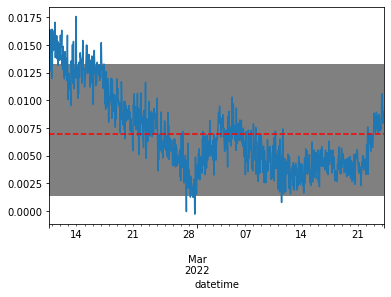

In [18]:
## Rule 전략 시각화
dataset['spread_ratio'].plot()
plt.axhline(dataset['spread_ratio'].mean(), color='r', linestyle='--')
plt.axhspan(cri_ustd, cri_lstd, facecolor='gray')

In [93]:
get_df('XBTZ22')

,open,high,low,close,volume
datetime,,,,,
2022-03-16 03:00:00,NaN,NaN,NaN,NaN,0.0
2022-03-16 04:00:00,41054.0,41054.0,41054.0,41054.0,100.0
2022-03-16 05:00:00,41054.0,41054.0,41054.0,41054.0,0.0
2022-03-16 06:00:00,41054.0,489000.0,489000.0,489000.0,200.0
2022-03-16 07:00:00,489000.0,40650.0,40500.0,40500.0,300.0
...,...,...,...,...,...
2022-03-24 01:00:00,44500.0,44071.5,43931.0,43931.0,400000.0
2022-03-24 02:00:00,43931.0,44296.0,43664.0,44296.0,1200300.0
2022-03-24 03:00:00,44296.0,44280.5,44086.5,44086.5,133600.0
